Import libraries

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd

Constants

In [2]:
DATASET = 'data.csv'
SAVE_MODEL = ''
RANDOM_SEED = 42
NUM_LETTERS = 4

Import data

In [3]:
X_data = np.loadtxt(DATASET, delimiter=',', usecols=range(1, 168+1))
x_rows = X_data.shape[0]
x_cols = X_data.shape[1]

y_data = np.loadtxt(DATASET, delimiter=',', usecols=0).astype(np.int32)
y_shape = y_data.shape

print('X: {} Rows\t{} Columns'.format(x_rows, x_cols))
print('Y: {} Rows'.format(y_shape[0]))

X: 260 Rows	168 Columns
Y: 260 Rows


Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.75, random_state=RANDOM_SEED)

Define model architecture

In [5]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(x_cols,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(50, activation='relu'),
    layers.Dense(NUM_LETTERS, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               43264     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                12850     
                                                                 
 dense_3 (Dense)             (None, 4)                 204       
                                                                 
Total params: 122,110
Trainable params: 122,110
Non-trai

In [7]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.00001, restore_best_weights=True)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(
    X_train, y_train,
    batch_size=30,
    epochs=300,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/300
7/7 [==============================] - 1s 34ms/step - loss: 1.2902 - accuracy: 0.6051 - val_loss: 1.1277 - val_accuracy: 0.7385
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.9971 - accuracy: 0.8718 - val_loss: 0.7701 - val_accuracy: 1.0000
Epoch 3/300
7/7 [==============================] - 0s 9ms/step - loss: 0.6133 - accuracy: 0.9641 - val_loss: 0.3777 - val_accuracy: 1.0000
Epoch 4/300
7/7 [==============================] - 0s 8ms/step - loss: 0.2800 - accuracy: 0.9744 - val_loss: 0.1421 - val_accuracy: 1.0000
Epoch 5/300
7/7 [==============================] - 0s 9ms/step - loss: 0.1055 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 7/300
7/7 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 8/300
7/7 [=========

Minimum Validation Loss: 3.2412084692623466e-05


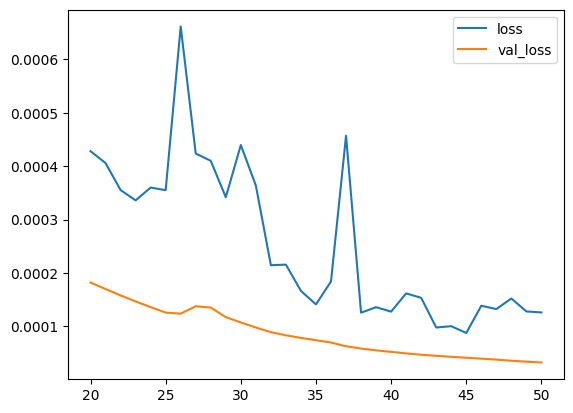

In [13]:
history_df = pd.DataFrame(history.history)
history_df.loc[20:, ['loss', 'val_loss']].plot();
print('Minimum Validation Loss: {}'.format(history_df['val_loss'].min()))

In [11]:
# keras.backend.clear_session()

In [14]:
model.save('alphabet_model.h5')